In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rugvedmhatre/NYU-ML-2024-Session-1/main/day5/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/rugvedmhatre/NYU-ML-2024-Session-1/main/day5/fish_market_label.csv')

In [ ]:
df.head()

,Length1,Length2,Length3,Height,Width
0,11.7,12.4,13.5,2.4300,1.2690
1,19.0,20.7,23.2,9.3960,3.4104
2,38.0,41.0,46.5,17.6235,6.3705
3,13.2,14.3,15.2,2.8728,2.0672
4,37.3,40.0,43.5,12.3540,6.5250


In [ ]:
label.head()

,Weight
0,13.4
1,170.0
2,950.0
3,19.7
4,1000.0


In [ ]:
# define the columns
features = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']].values
weight = label["Weight"].values

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
def create_design(xcol, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(xcol)

In [ ]:
# function for determining best mse thresholds

def find_mse(data):
  # print(np.var(data))
  return np.var(data)*0.1

In [ ]:
# normalize the x (easier to look and compare mse)

scaler_X = StandardScaler()

feat = scaler_X.fit_transform(features)

# sort the volumes (make a linearly increasing bottom for graphing)
sorted_idx = np.argsort(feat[:, 0])

In [ ]:
# function for training

def train(model_obj):
  # helpers to check for the best model
  best_mse = [np.inf, np.inf]
  best_order = -np.inf
  best_model = model_obj
  best_alpha = 0

  tuple_of = ()

  alpha_params = {"alpha": [0.001, 0.01, 0.1, 1.0, 100]}

  # testing polynomial shapes
  for i in range(1, 11):
    X = create_design(feat, i)

    X_train, X_test, y_train, y_test = train_test_split(X, weight, random_state=42)

    if type(model_obj).__name__ == "Ridge" or type(model_obj).__name__ == "Lasso":
      grid = GridSearchCV(model_obj, alpha_params, scoring='neg_mean_squared_error', cv=5)
      grid.fit(X_train, y_train)

      best_ridge = grid.best_estimator_
      best_alpha = grid.best_params_['alpha']

    model = model_obj.__class__()

    model.fit(X_train, y_train)
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    y_preds_full = model.predict(X)

    # checking with a naive model (putting mean for all)
    naive_mse = mean_squared_error(np.full_like(y_preds_full, np.mean(y_preds_full)), y_preds_full)
    print(f"{i} - Naive MSE: {naive_mse}")

    print(f"{i} - Limit for MSE: {find_mse(y_preds_full)}")

    train_mse = mean_squared_error(y_train, y_train_preds)
    test_mse = mean_squared_error(y_test, y_test_preds)
    print(f"{i} - Training MSE: {train_mse}")
    print(f"{i} - Test MSE: {test_mse}")

    # check for best mse + order
    if test_mse < best_mse[1] and test_mse < find_mse(y_preds_full):
      best_order = i
      best_mse = [train_mse, test_mse]
      best_model = model
      tuple_of = (feat, weight, feat[sorted_idx], y_preds_full[sorted_idx], best_order, best_alpha, best_model)
  print(f"Best order polynomial: {best_order}")
  return tuple_of

In [ ]:
lvol_og, lweight_og, lvol_pred, lweight_full, lbest, lalpha, lmodel = train(LinearRegression(fit_intercept=True))

# x_sorted = lvol_pred[:, 0]
# plt.figure(figsize=(10, 6))
# plt.scatter(x_sorted, lweight_og[lvol_og[:, 0].argsort()], color='blue', label='Actual Weight')
# plt.plot(x_sorted, lweight_full, color='red', linewidth=2, label='Predicted Weight')
# plt.xlabel('Feature 1 (Normalized Length1)')
# plt.ylabel('Weight')
# plt.title(f'Polynomial Regression (degree={lbest}) Predictions vs Actual')
# plt.legend()
# plt.show()

1 - Naive MSE: 90719.79913657912
1 - Limit for MSE: 9071.979913657913
1 - Training MSE: 11882.855095769297
1 - Test MSE: 17022.41289704004
2 - Naive MSE: 109980.37183304221
2 - Limit for MSE: 10998.037183304223
2 - Training MSE: 1398.2876193193592
2 - Test MSE: 4673.939620505452
3 - Naive MSE: 106322.66780309517
3 - Limit for MSE: 10632.266780309517
3 - Training MSE: 429.94068561593537
3 - Test MSE: 7158.555002172757
4 - Naive MSE: 6955266.754117115
4 - Limit for MSE: 695526.6754117116
4 - Training MSE: 3.41518760310373e-18
4 - Test MSE: 26237928.097041793
5 - Naive MSE: 3788046.8667762945
5 - Limit for MSE: 378804.6866776295
5 - Training MSE: 2.313426587911618e-19
5 - Test MSE: 16202183.107108619
6 - Naive MSE: 8724456.64893455
6 - Limit for MSE: 872445.6648934551
6 - Training MSE: 3.4300743116913816e-20
6 - Test MSE: 35376773.27550779
7 - Naive MSE: 31811197.619964253
7 - Limit for MSE: 3181119.7619964257
7 - Training MSE: 5.258775170859686e-19
7 - Test MSE: 126069847.91616438
8 - Na

In [ ]:
svol_og, sweight_og, svol_pred, sweight_full, sbest, salpha, smodel = train(Lasso(fit_intercept=True))

# plt.figure(figsize=(10, 6))
# plt.scatter(x_sorted, sweight_og[svol_og[:, 0].argsort()], color='blue', label='Actual Weight')
# plt.plot(x_sorted, sweight_full, color='red', linewidth=2, label='Predicted Weight')
# plt.xlabel('Feature 1 (Normalized Length1)')
# plt.ylabel('Weight')
# plt.title(f'Lasso Regression (degree={sbest}) Predictions vs Actual')
# plt.legend()
# plt.show()

1 - Naive MSE: 90005.40241275815
1 - Limit for MSE: 9000.540241275816
1 - Training MSE: 12001.973915967585
1 - Test MSE: 17709.699467033744
2 - Naive MSE: 106250.7266610196
2 - Limit for MSE: 10625.07266610196
2 - Training MSE: 1841.9384097123288
2 - Test MSE: 4166.141770915957
3 - Naive MSE: 106322.20778793316
3 - Limit for MSE: 10632.220778793317
3 - Training MSE: 1237.9924022185635
3 - Test MSE: 4416.044494237412
4 - Naive MSE: 109783.71777880797
4 - Limit for MSE: 10978.371777880799
4 - Training MSE: 1001.7445386368815
4 - Test MSE: 5166.190134572134
5 - Naive MSE: 111354.36239062554
5 - Limit for MSE: 11135.436239062554
5 - Training MSE: 881.5406539359276
5 - Test MSE: 5933.340920053179
6 - Naive MSE: 112697.72421587206
6 - Limit for MSE: 11269.772421587208
6 - Training MSE: 853.7388584995065
6 - Test MSE: 6423.772090673165
7 - Naive MSE: 113575.44161644376
7 - Limit for MSE: 11357.544161644377
7 - Training MSE: 853.0267091523684
7 - Test MSE: 6968.471216602839
8 - Naive MSE: 1156

In [ ]:
rvol_og, rweight_og, rvol_pred, rweight_full, rbest, ralpha, rmodel = train(Ridge(fit_intercept=True))

# plt.figure(figsize=(10, 6))
# plt.scatter(x_sorted, rweight_og[svol_og[:, 0].argsort()], color='blue', label='Actual Weight')
# plt.plot(x_sorted, rweight_full, color='red', linewidth=2, label='Predicted Weight')
# plt.xlabel('Feature 1 (Normalized Length1)')
# plt.ylabel('Weight')
# plt.title(f'Ridge Regression (degree={rbest}) Predictions vs Actual')
# plt.legend()
# plt.show()

1 - Naive MSE: 90053.28676525655
1 - Limit for MSE: 9005.328676525654
1 - Training MSE: 12045.409535711251
1 - Test MSE: 17714.878474740744
2 - Naive MSE: 105721.40674228511
2 - Limit for MSE: 10572.14067422851
2 - Training MSE: 1765.0944506777216
2 - Test MSE: 4148.353024956749
3 - Naive MSE: 107260.37434630297
3 - Limit for MSE: 10726.037434630298
3 - Training MSE: 1097.4192232755547
3 - Test MSE: 4162.463220492706
4 - Naive MSE: 111316.00402715456
4 - Limit for MSE: 11131.600402715456
4 - Training MSE: 798.9092411737221
4 - Test MSE: 5521.913940852559
5 - Naive MSE: 113947.4160936018
5 - Limit for MSE: 11394.74160936018
5 - Training MSE: 712.2382712655185
5 - Test MSE: 6262.269500951632
6 - Naive MSE: 108238.83072223107
6 - Limit for MSE: 10823.883072223107
6 - Training MSE: 677.4405485035011
6 - Test MSE: 23398.14486531927
7 - Naive MSE: 110171.91056041571
7 - Limit for MSE: 11017.19105604157
7 - Training MSE: 619.5165512246994
7 - Test MSE: 28864.37268785266
8 - Naive MSE: 125556.

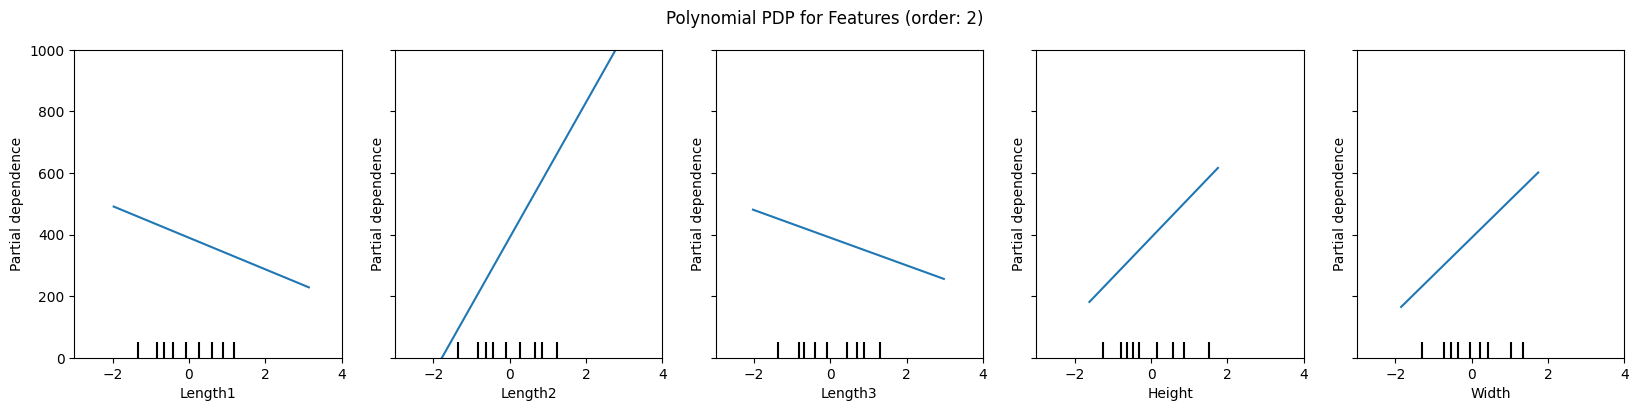

In [ ]:
# using pdp plots (google said it was the best for multivar lmao)
from sklearn.inspection import PartialDependenceDisplay

feature_names = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

poly = PolynomialFeatures(degree=lbest, include_bias=False)
X_poly = poly.fit_transform(feat)
feature_names_poly = poly.get_feature_names_out(feature_names)

fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)

# plot pdp
display = PartialDependenceDisplay.from_estimator(
    lmodel,
    X_poly,
    features=[0,1,2,3,4],
    feature_names=feature_names_poly,
    grid_resolution=100,
    kind='average',
    ax=axs,
)

# set scale for axis
for ax in axs:
    ax.set_xlim(-3, 4)
    ax.set_ylim(0, 1000)

fig.suptitle(f"Polynomial PDP for Features (order: {lbest})")
plt.show()


# len2 is most influential bc of steepest slope
# len1 and len3 have negative influences (as these values get bigger, the prediction decreases)
# averaging the len1 len2 and len3 we can somewhat approximate that the correlation is very slightly positive (less that height and width)
# height and width both contribute positively (expected) but not as much
# theres a lot of diff ranges, so all of these seem to have diff magnitudes of influence

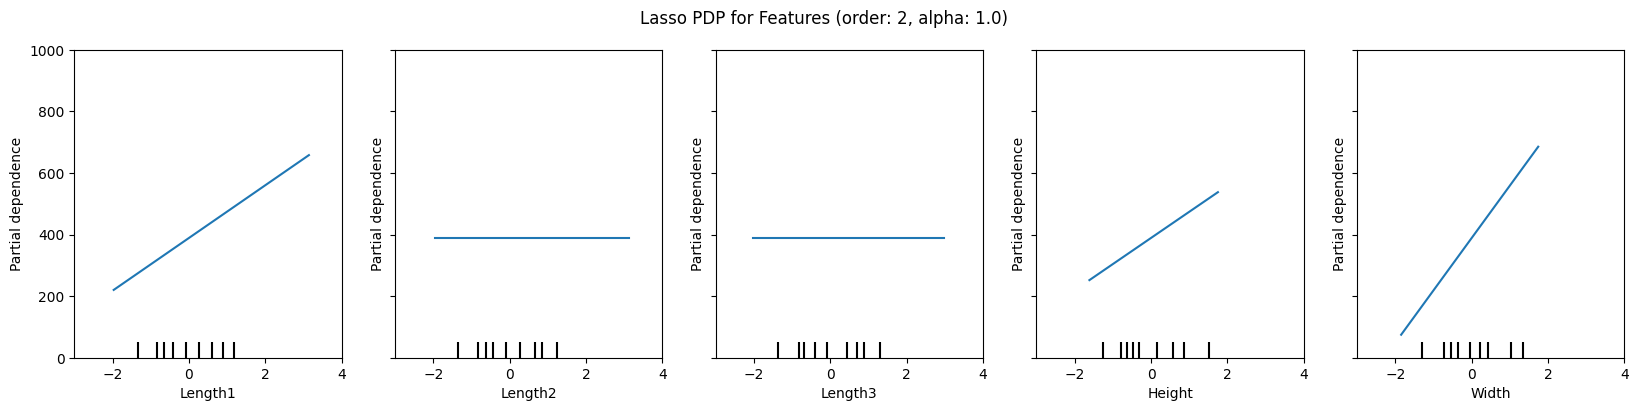

In [ ]:
poly = PolynomialFeatures(degree=sbest, include_bias=False)
X_poly = poly.fit_transform(feat)
feature_names_poly = poly.get_feature_names_out(feature_names)

fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)

display = PartialDependenceDisplay.from_estimator(
    smodel,
    X_poly,
    features=[0,1,2,3,4],
    feature_names=feature_names_poly,
    grid_resolution=100,
    kind='average',
    ax=axs
)

# set scale for axis
for ax in axs:
    ax.set_xlim(-3, 4)
    ax.set_ylim(0, 1000)

fig.suptitle(f"Lasso PDP for Features (order: {sbest}, alpha: {salpha})")
plt.show()

# in this one, width is the most influential
# something that's really weird is that len2 and len3 seem to have virtually no effect
# again, height and width have positive correlations (as expected)
# averaging out the lens gives us a smaller but still positive correlation

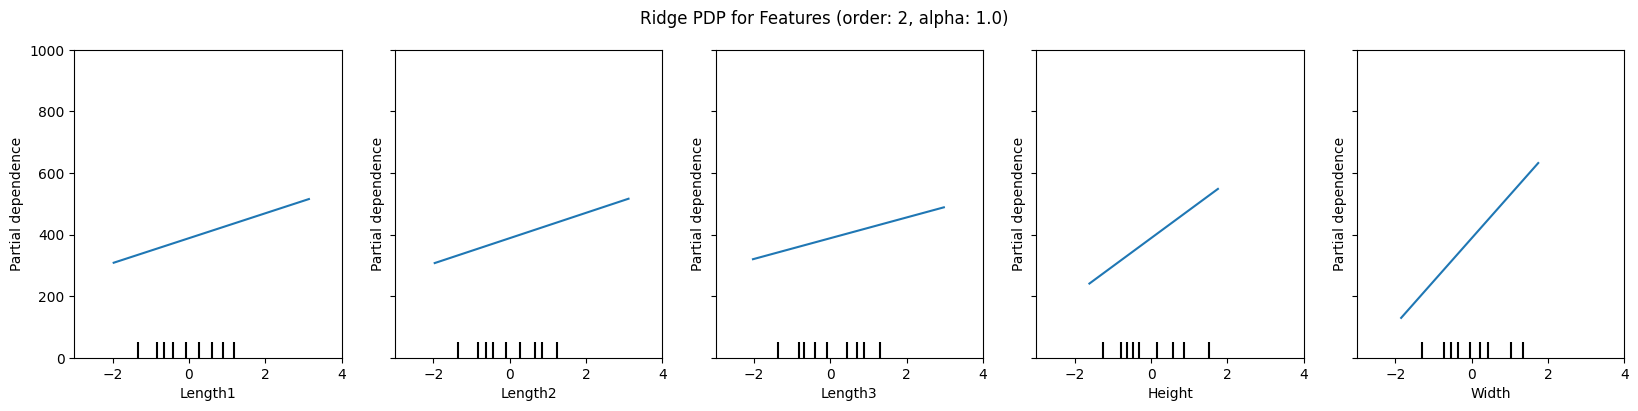

In [ ]:
poly = PolynomialFeatures(degree=rbest, include_bias=False)
X_poly = poly.fit_transform(feat)
feature_names_poly = poly.get_feature_names_out(feature_names)

fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)

display = PartialDependenceDisplay.from_estimator(
    rmodel,
    X_poly,
    features=[0,1,2,3,4],
    feature_names=feature_names_poly,
    grid_resolution=100,
    kind='average',
    ax=axs
)

# set scale for axis
for ax in axs:
    ax.set_xlim(-3, 4)
    ax.set_ylim(0, 1000)

fig.suptitle(f"Ridge PDP for Features (order: {rbest}, alpha: {ralpha})")
plt.show()

# similar to the lasso, this model is also the most affected by the width, though not by a lot
# all of the lengths seem to have the same correlation, which is unique for this plot

In [ ]:
try:
  fish_length1 = float(input("Input the first length of the fish in cm: "))
  fish_length2 = float(input("Input the second length of the fish in cm: "))
  fish_length3 = float(input("Input the third length of the fish in cm: "))
  fish_height = float(input("Input the height of the fish in cm: "))
  fish_width = float(input("Input the width of the fish in cm: "))
except Exception as e:
  print(e, "- Measurements must be numbers!!")

fish_array = np.array((fish_length1, fish_length2, fish_length3, fish_height, fish_width))

fish_array_scaled = scaler_X.transform([fish_array])
fish_array_scaled = np.array(fish_array_scaled)

X_l = create_design(fish_array_scaled, lbest)
X_s = create_design(fish_array_scaled, sbest)
X_r = create_design(fish_array_scaled, rbest)

weight_pred = lmodel.predict(X_l)
print(f"Polynomial: {round(weight_pred[0], 2)}lbs")
weight_pred = smodel.predict(X_s)
print(f"Lasso: {round(weight_pred[0], 2)}lbs")
weight_pred = rmodel.predict(X_r)
print(f"Ridge: {round(weight_pred[0], 2)}lbs")

Input the first length of the fish in cm: 1
Input the second length of the fish in cm: 1
Input the third length of the fish in cm: 1
Input the height of the fish in cm: 1
Input the width of the fish in cm: 1
Polynomial: 291.72lb
Lasso: 266.49lb
Ridge: 260.54lb
